# Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from statsmodels.sandbox.stats.runs import runstest_1samp
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import acf

import os
import re
from scipy import ndimage
import math
import random
import cv2
import skimage
from scipy import stats
import pylab

from PIL import Image, ImageEnhance
from skimage.measure import label, regionprops
from skimage.io import imsave
from sklearn.decomposition import PCA

In [2]:
# Loading a CSV file into a DataFrame
df = pd.read_csv('../Processed dataset/df.csv')
df_voids = pd.read_csv('../Processed dataset/df_voids.csv')
df_parts = pd.read_csv('../Processed dataset/df_parts.csv')

df_new = pd.read_csv('../Processed dataset/df_new.csv')
df_new_voids = pd.read_csv('../Processed dataset/df_new_voids.csv')
df_new_parts = pd.read_csv('../Processed dataset/df_new_parts.csv')

print(df_parts.shape)
print(df_new_parts.shape)
print()
print(df_voids.shape)
print(df_new_voids.shape)
print()
print(df.shape)
print(df_new.shape)

(40, 15)
(40, 18)

(1754, 15)
(1746, 18)

(1794, 15)
(1786, 18)


In [28]:
df_parts.columns.tolist()

['Image name',
 'Position',
 'Region type',
 'ID',
 'Area [pixels]',
 'Perimeter [pixels]',
 'Eccentricity',
 'Orientation [radians]',
 'Solidity',
 'Extent',
 'Major Axis Length [pixels]',
 'Minor Axis Length [pixels]',
 'Equivalent Diameter [pixels]',
 'Part_ID',
 'Num_voids']

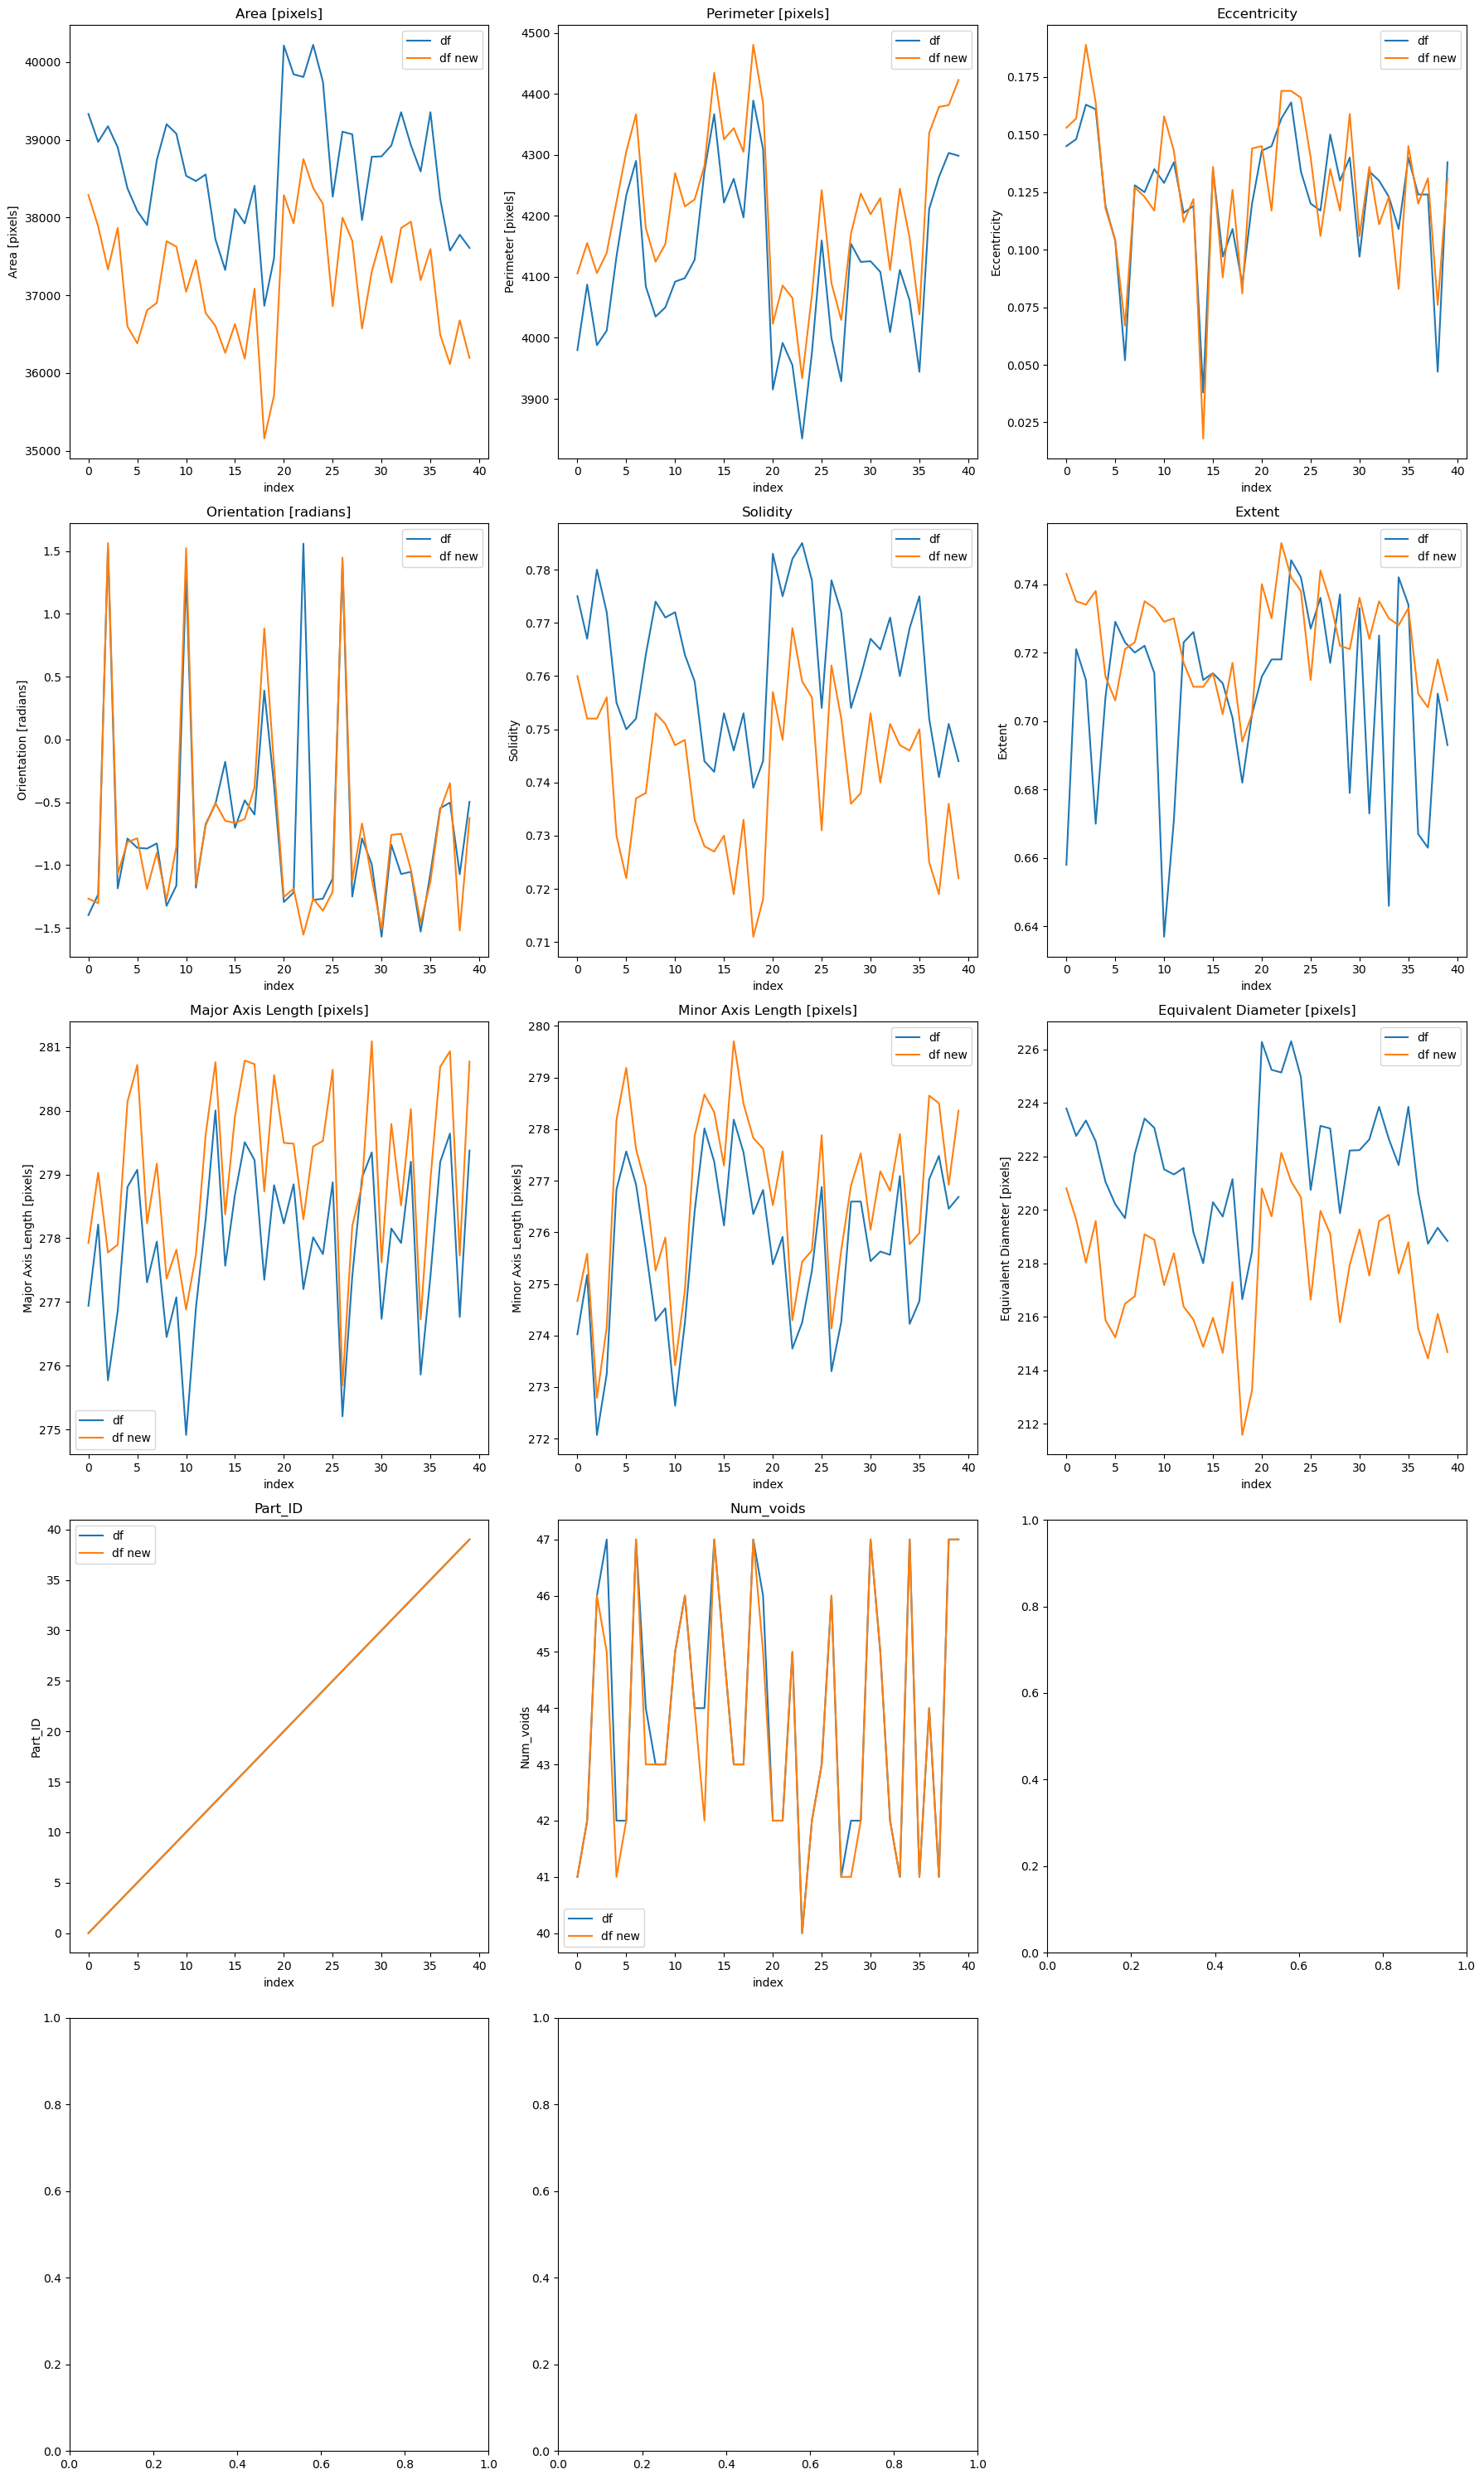

In [32]:
num_columns = len(df_parts.columns[4:])
num_rows = num_columns // 3 + num_columns % 3  # Calcola il numero di righe necessarie per i subplot

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6*num_rows))  # Crea i subplot

for i, column in enumerate(df_parts.columns[4:]):
	row_index = i // 3  # Calcola l'indice della riga corrente
	col_index = i % 3   # Calcola l'indice della colonna corrente

	# Traccia la colonna corrente di df rispetto alla corrispondente colonna di df_new
	axes[row_index, col_index].plot(df_parts[column], label='df')
	axes[row_index, col_index].plot(df_new_parts[column], label='df new')

	# Aggiungi titolo, etichette degli assi e legenda
	axes[row_index, col_index].set_title(column)
	axes[row_index, col_index].set_xlabel('index')
	axes[row_index, col_index].set_ylabel(column)
	axes[row_index, col_index].legend()

# Se c'è un numero dispari di colonne, elimina l'ultimo subplot vuoto
if num_columns % 3 != 0:
	fig.delaxes(axes[num_rows - 1, num_columns % 3])

plt.tight_layout()  # Regola i margini per evitare sovrapposizioni
plt.show()

# Normality
## parts

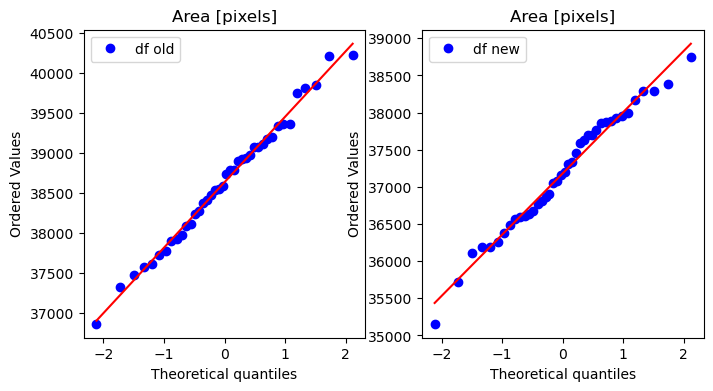

<Figure size 640x480 with 0 Axes>

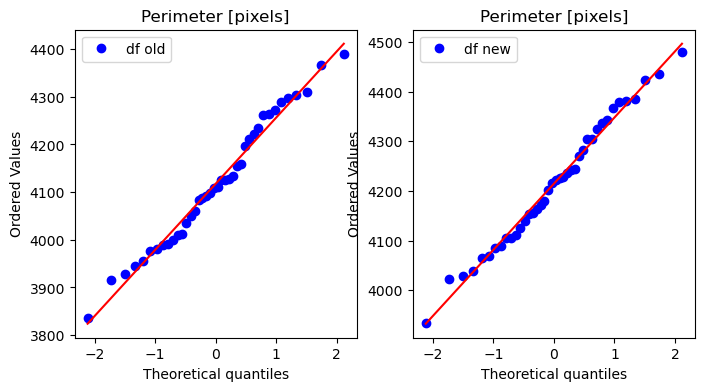

<Figure size 640x480 with 0 Axes>

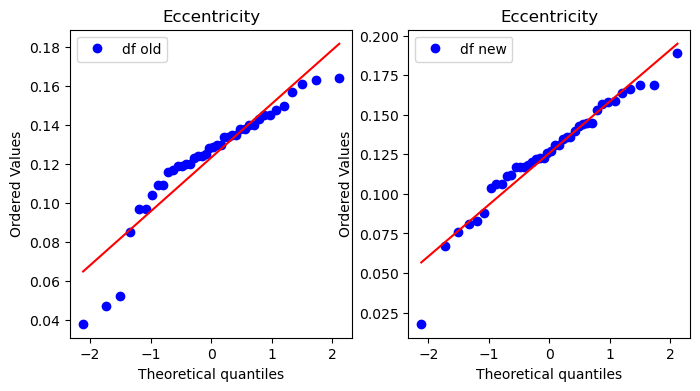

<Figure size 640x480 with 0 Axes>

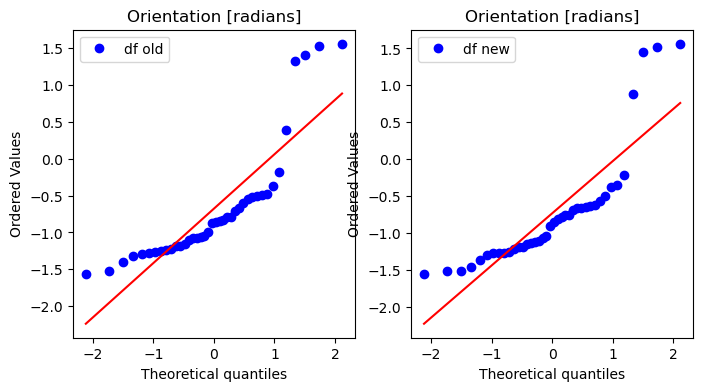

<Figure size 640x480 with 0 Axes>

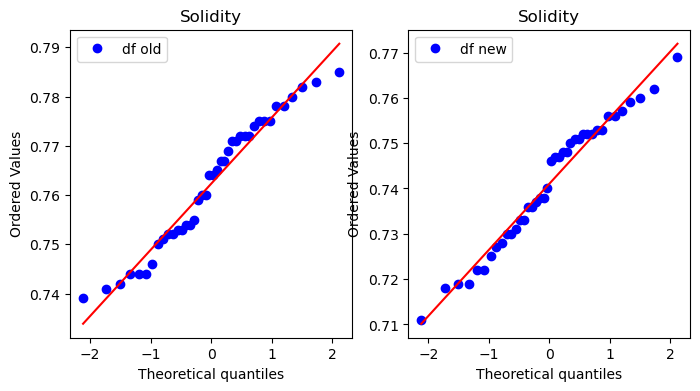

<Figure size 640x480 with 0 Axes>

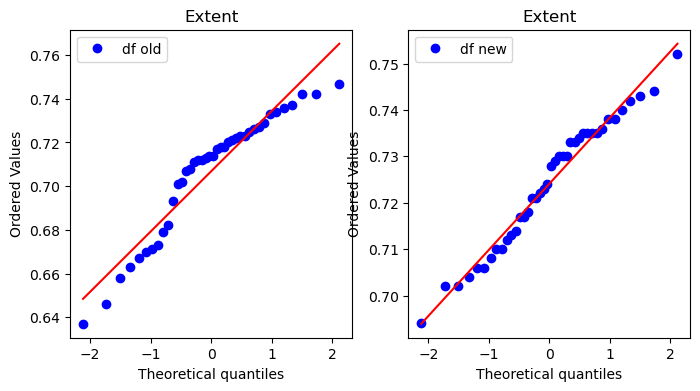

<Figure size 640x480 with 0 Axes>

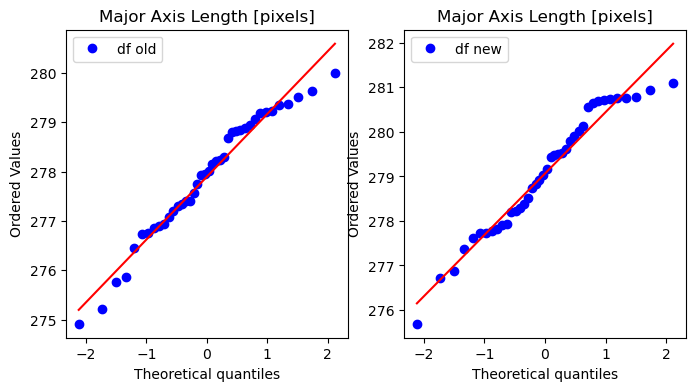

<Figure size 640x480 with 0 Axes>

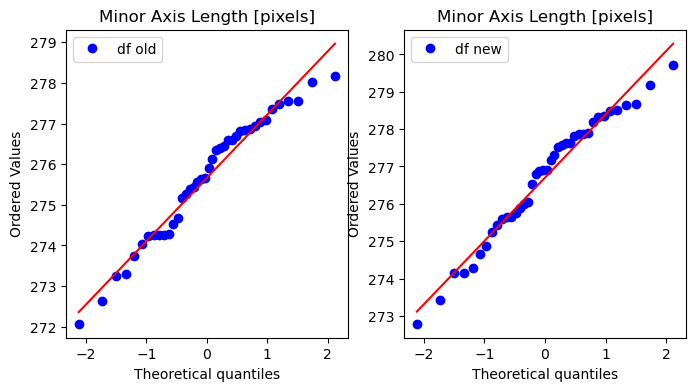

<Figure size 640x480 with 0 Axes>

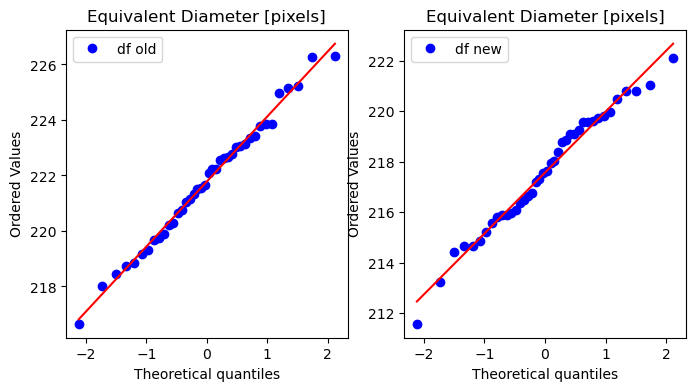

<Figure size 640x480 with 0 Axes>

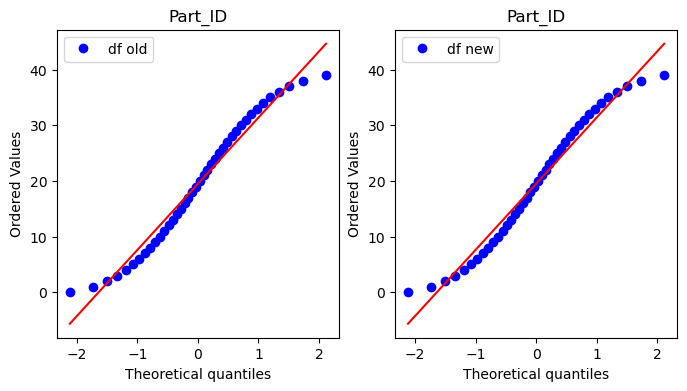

<Figure size 640x480 with 0 Axes>

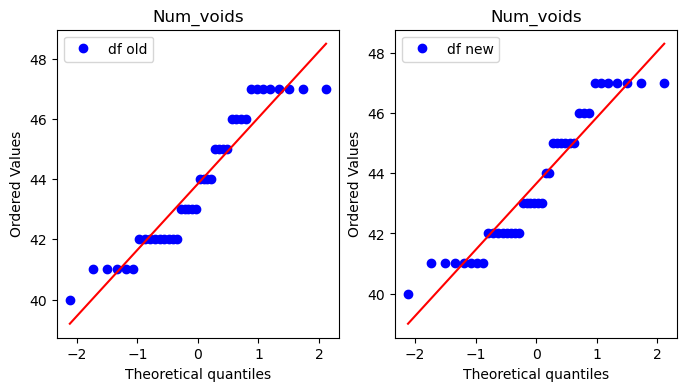

<Figure size 640x480 with 0 Axes>

In [44]:
for i, column in enumerate(df_parts.columns[4:]):
	plt.figure(figsize=(8,4))
	plt.subplot(1, 2, 1)
	stats.probplot(df_parts[column], dist="norm", plot=plt)
	plt.legend(['df old'])
	plt.title(f"{column}")
	# plt.title(f"Q-Q Plot")

	plt.subplot(1, 2, 2)
	stats.probplot(df_new_parts[column], dist="norm", plot=plt)
	plt.legend(['df new'])
	plt.title(f"{column}")

	# plt.subplot(2,2,1)
	# plt.hist(df_parts[column], color='skyblue', edgecolor='black')
	# plt.title(f'df old - {column}')

	# plt.subplot(2,2,2)
	# plt.hist(df_new_parts[column], color='skyblue', edgecolor='black')
	# plt.title(f'df new - {column}')
	
	plt.show()
	plt.suptitle(column)
	plt.tight_layout()
	

In [45]:
for column in df_parts.columns[4:]:
	# Calcola il p-value di normalità per la colonna corrente di df_parts
	shapiro_stat, shapiro_pvalue_parts = stats.shapiro(df_parts[column])
	
	# Calcola il p-value di normalità per la colonna corrente di df_new_parts
	shapiro_stat, shapiro_pvalue_new_parts = stats.shapiro(df_new_parts[column])
   
	# Stampa i risultati
	print(f"({column}) P-value di normalità per df_parts: {shapiro_pvalue_parts} - normality (alpha 5%)? {shapiro_pvalue_parts>0.05}")
	print(f"({column})  P-value di normalità per df_new_parts: {shapiro_pvalue_new_parts} - normality (alpha 5%)? {shapiro_pvalue_new_parts>0.05}\n")

(Area [pixels]) P-value di normalità per df_parts: 0.9523186683654785 - normality (alpha 5%)? True
(Area [pixels])  P-value di normalità per df_new_parts: 0.7310476303100586 - normality (alpha 5%)? True

(Perimeter [pixels]) P-value di normalità per df_parts: 0.6340415477752686 - normality (alpha 5%)? True
(Perimeter [pixels])  P-value di normalità per df_new_parts: 0.8690754771232605 - normality (alpha 5%)? True

(Eccentricity) P-value di normalità per df_parts: 0.0004302806337364018 - normality (alpha 5%)? False
(Eccentricity)  P-value di normalità per df_new_parts: 0.09720978140830994 - normality (alpha 5%)? True

(Orientation [radians]) P-value di normalità per df_parts: 1.2606984682861366e-06 - normality (alpha 5%)? False
(Orientation [radians])  P-value di normalità per df_new_parts: 9.760273087522364e-07 - normality (alpha 5%)? False

(Solidity) P-value di normalità per df_parts: 0.09568046033382416 - normality (alpha 5%)? True
(Solidity)  P-value di normalità per df_new_parts: 

## voids

In [7]:
for column in df_voids.columns[4:]:
	# Calcola il p-value di normalità per la colonna corrente di df_parts
	shapiro_stat, shapiro_pvalue_parts = stats.shapiro(df_voids[column])
	
	# Calcola il p-value di normalità per la colonna corrente di df_new_parts
	shapiro_stat, shapiro_pvalue_new_parts = stats.shapiro(df_new_voids[column])
   
	# Stampa i risultati
	print(f"({column}) P-value di normalità per df_parts: {shapiro_pvalue_parts} - normality (alpha 5%)? {shapiro_pvalue_parts>0.05}")
	print(f"({column})  P-value di normalità per df_new_parts: {shapiro_pvalue_new_parts} - normality (alpha 5%)? {shapiro_pvalue_new_parts>0.05}\n")

(Area [pixels]) P-value di normalità per df_parts: 2.0412113024946587e-20 - normality (alpha 5%)? False
(Area [pixels])  P-value di normalità per df_new_parts: 2.3945451846853497e-19 - normality (alpha 5%)? False

(Perimeter [pixels]) P-value di normalità per df_parts: 2.103489320732323e-24 - normality (alpha 5%)? False
(Perimeter [pixels])  P-value di normalità per df_new_parts: 2.1021264057463728e-23 - normality (alpha 5%)? False

(Eccentricity) P-value di normalità per df_parts: 4.764414778704378e-44 - normality (alpha 5%)? False
(Eccentricity)  P-value di normalità per df_new_parts: 1.0062724272316511e-41 - normality (alpha 5%)? False

(Orientation [radians]) P-value di normalità per df_parts: 2.7413830708916456e-31 - normality (alpha 5%)? False
(Orientation [radians])  P-value di normalità per df_new_parts: 2.1616649920943584e-31 - normality (alpha 5%)? False

(Solidity) P-value di normalità per df_parts: 2.970749100992605e-38 - normality (alpha 5%)? False
(Solidity)  P-value di n

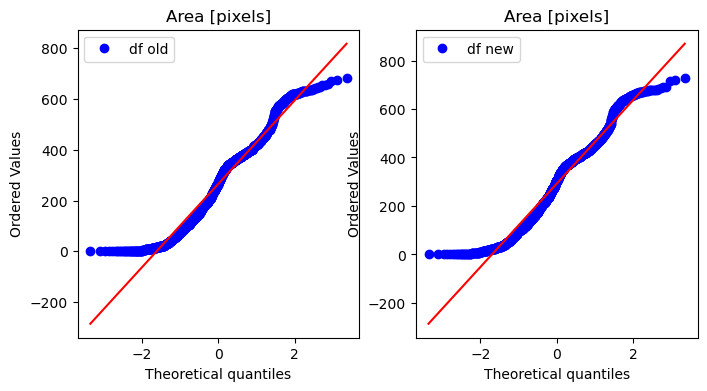

<Figure size 640x480 with 0 Axes>

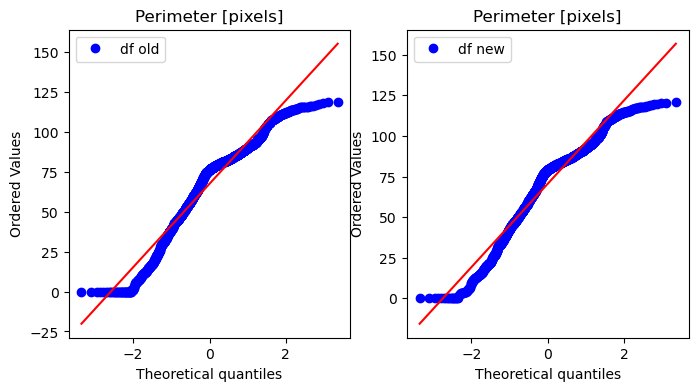

<Figure size 640x480 with 0 Axes>

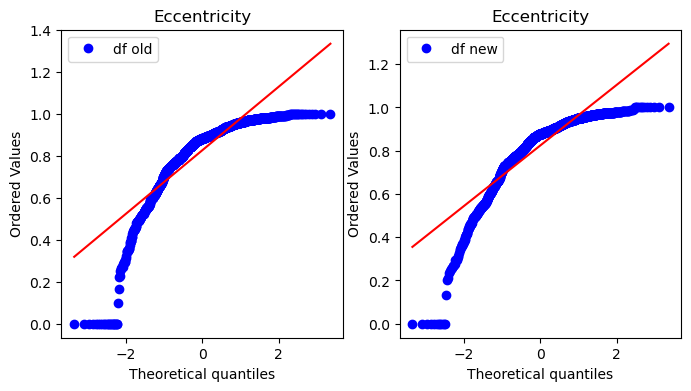

<Figure size 640x480 with 0 Axes>

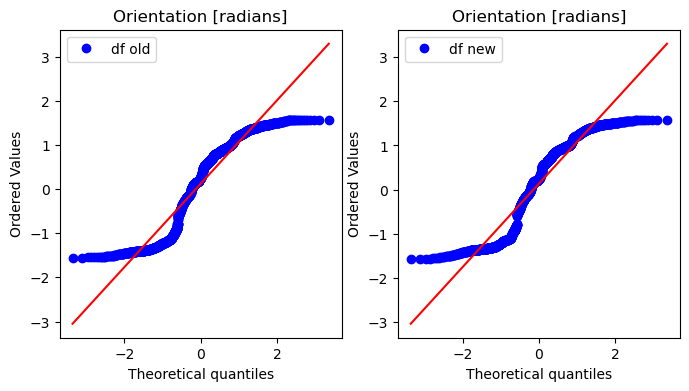

<Figure size 640x480 with 0 Axes>

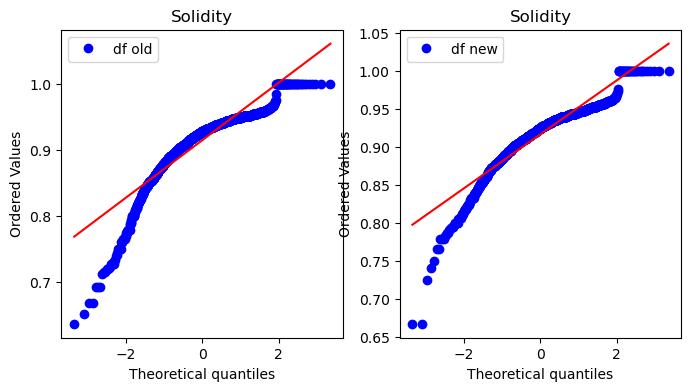

<Figure size 640x480 with 0 Axes>

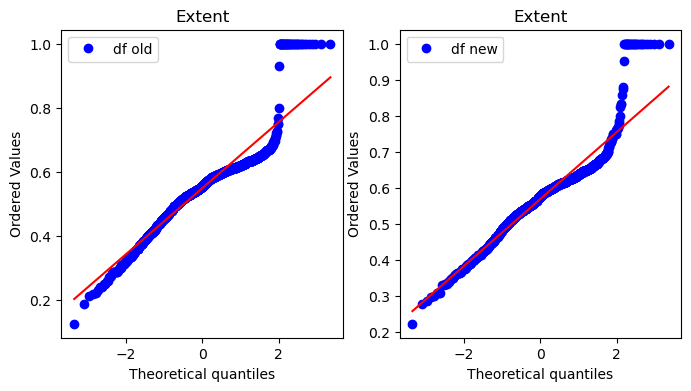

<Figure size 640x480 with 0 Axes>

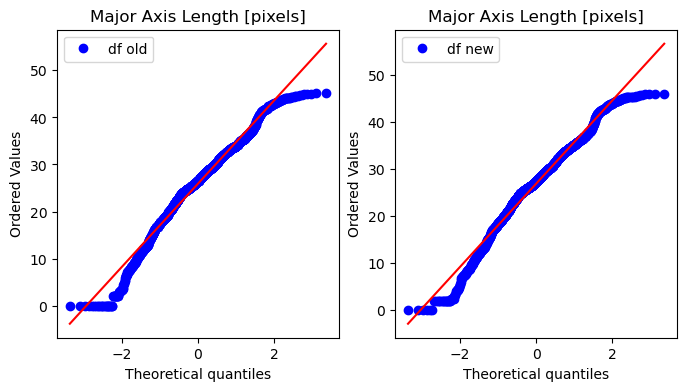

<Figure size 640x480 with 0 Axes>

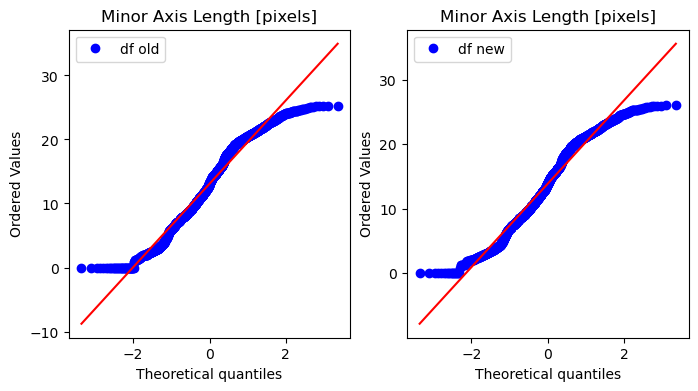

<Figure size 640x480 with 0 Axes>

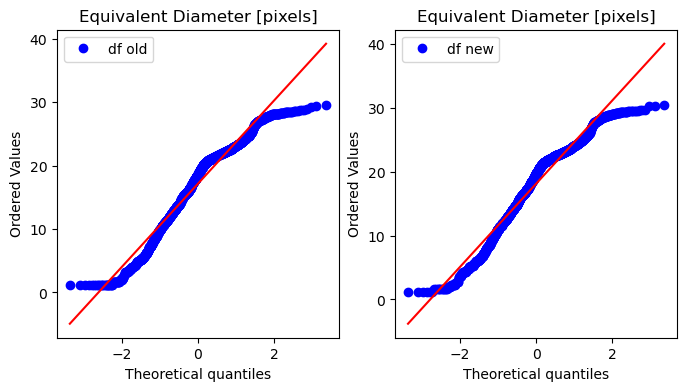

<Figure size 640x480 with 0 Axes>

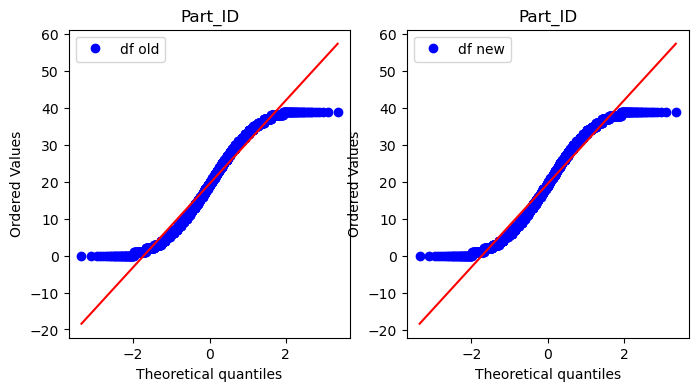

<Figure size 640x480 with 0 Axes>

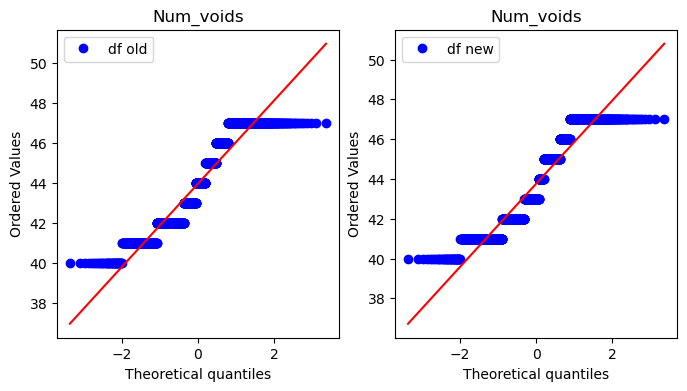

<Figure size 640x480 with 0 Axes>

In [46]:
for i, column in enumerate(df_voids.columns[4:]):
	plt.figure(figsize=(8, 4))
	plt.subplot(1, 2, 1)
	stats.probplot(df_voids[column], dist="norm", plot=plt)
	plt.legend(['df old'])
	plt.title(f"{column}")
	# plt.title(f"Q-Q Plot")

	plt.subplot(1, 2, 2)
	stats.probplot(df_new_voids[column], dist="norm", plot=plt)
	plt.legend(['df new'])
	plt.title(f"{column}")

	plt.show()
	plt.suptitle(column)
	plt.tight_layout()
	

## Each image focus

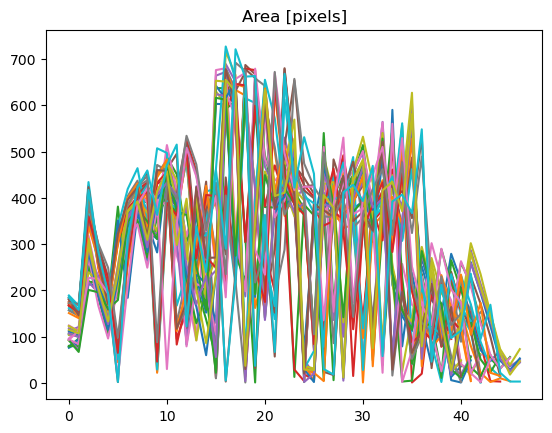

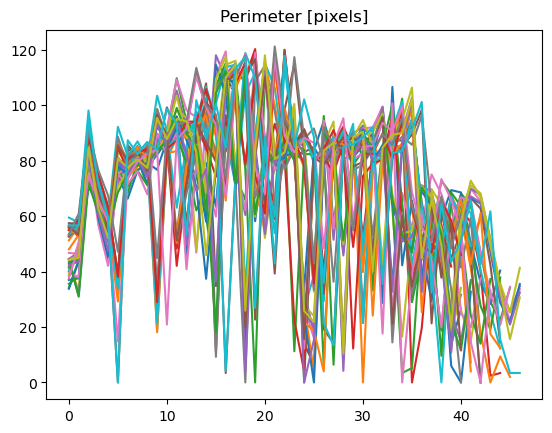

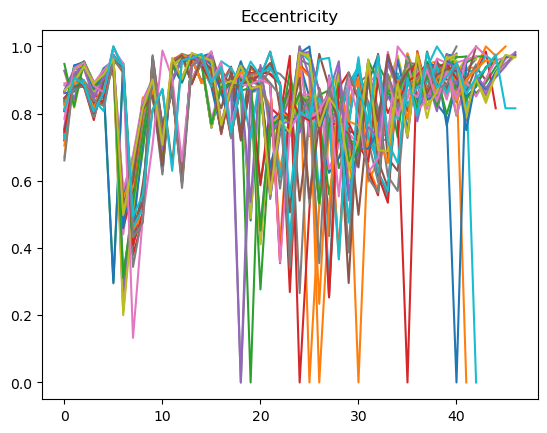

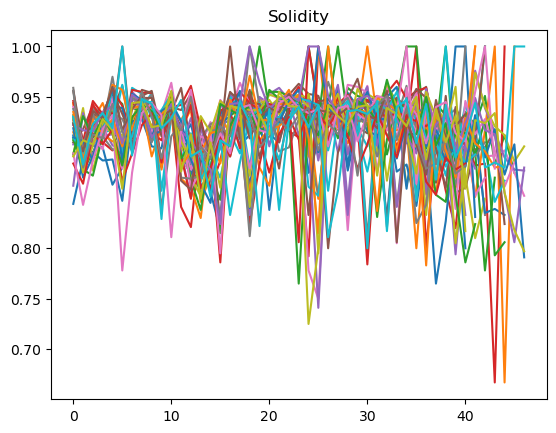

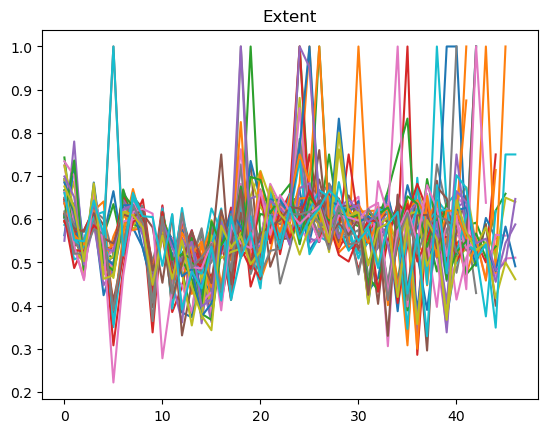

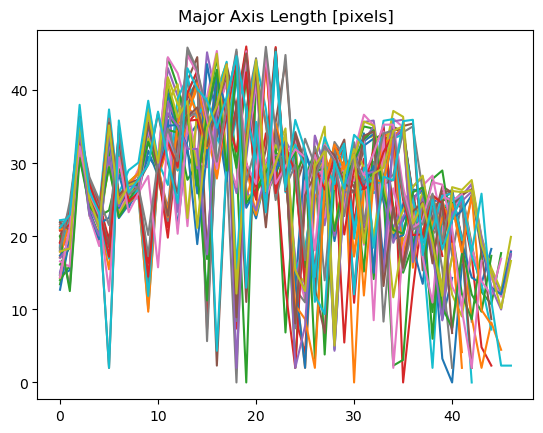

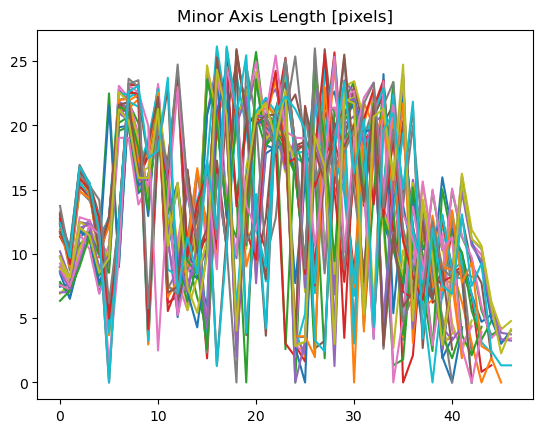

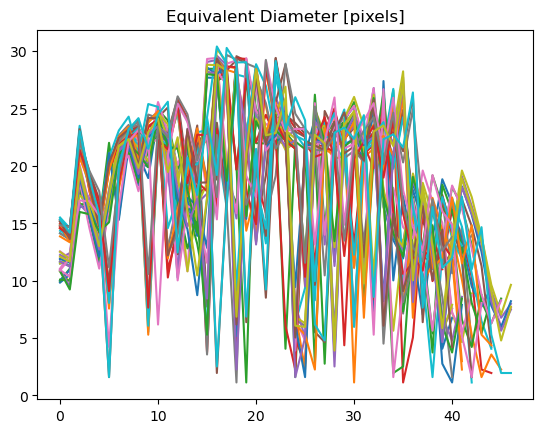

In [80]:
for interested_column in normal_vars:
	for pid in range(0,40):
		# Seleziona le righe corrispondenti al Part_ID attuale
		img_df = df_new_voids.loc[df_new_voids['Part_ID'] == pid, df_new_voids.columns[interested_column]]
		plt.plot(range(0,len(img_df)),img_df, label=f'Part_ID {pid}')

	# Aggiungi legenda
	# plt.legend()

	# Aggiungi titolo al plot
	plt.title(f'{df_new_voids.columns[interested_column]}')
	plt.show()

# Towards spc

In [90]:
dataNum = df_new_parts.select_dtypes(include=np.number)
dataset=dataNum.drop(columns=['ID','Part_ID']) # remove also Num_Wpixels, same info of Area
# no we remove stuff later
dataset.head(10)

Area [pixels]  Perimeter [pixels]  Eccentricity  Orientation [radians]  \
0          38291            4105.674         0.153                 -1.268   
1          37887            4155.306         0.157                 -1.304   
2          37334            4106.076         0.189                  1.564   
3          37868            4139.319         0.164                 -1.070   
4          36599            4223.005         0.118                 -0.817   
5          36382            4305.088         0.104                 -0.787   
6          36808            4366.544         0.067                 -1.190   
7          36903            4180.034         0.127                 -0.903   
8          37697            4124.720         0.123                 -1.276   
9          37626            4153.833         0.117                 -0.853   

   Solidity  Extent  Major Axis Length [pixels]  Minor Axis Length [pixels]  \
0     0.760   0.743                     277.925                     274.667   
1     0.752   0.735                     279.026                     275.584   
2     0.752   0.734                     277.777                     272.791   
3     0.756   0.738                     277.900                     274.158   
4     0.730   0.713                     280.140                     278.182   
5     0.722   0.706                     280.715                     279.187   
6     0.737   0.721                     278.233                     277.617   
7     0.738   0.723                     279.169                     276.892   
8     0.753   0.735                     277.368                     275.259   
9     0.751   0.733                     277.820                     275.897   

   Equivalent Diameter [pixels]  Num_voids  Num_Wpixels  Num_Bpixels  \
0                       220.802         41        38291        13692   
1                       219.634         42        37887        14096   
2                       218.026         46        37334        14194   
3                       219.579         45        37868        13661   
4                       215.869         41        36599        15385   
5                       215.228         42        36382        15602   
6                       216.484         47        36808        14721   
7                       216.763         43        36903        15081   
8                       219.083         43        37697        14059   
9                       218.876         43        37626        14130   

   Wpixels_ratio  
0       0.736606  
1       0.728834  
2       0.724538  
3       0.734887  
4       0.704044  
5       0.699869  
6       0.714316  
7       0.709892  
8       0.728360  
9       0.726988

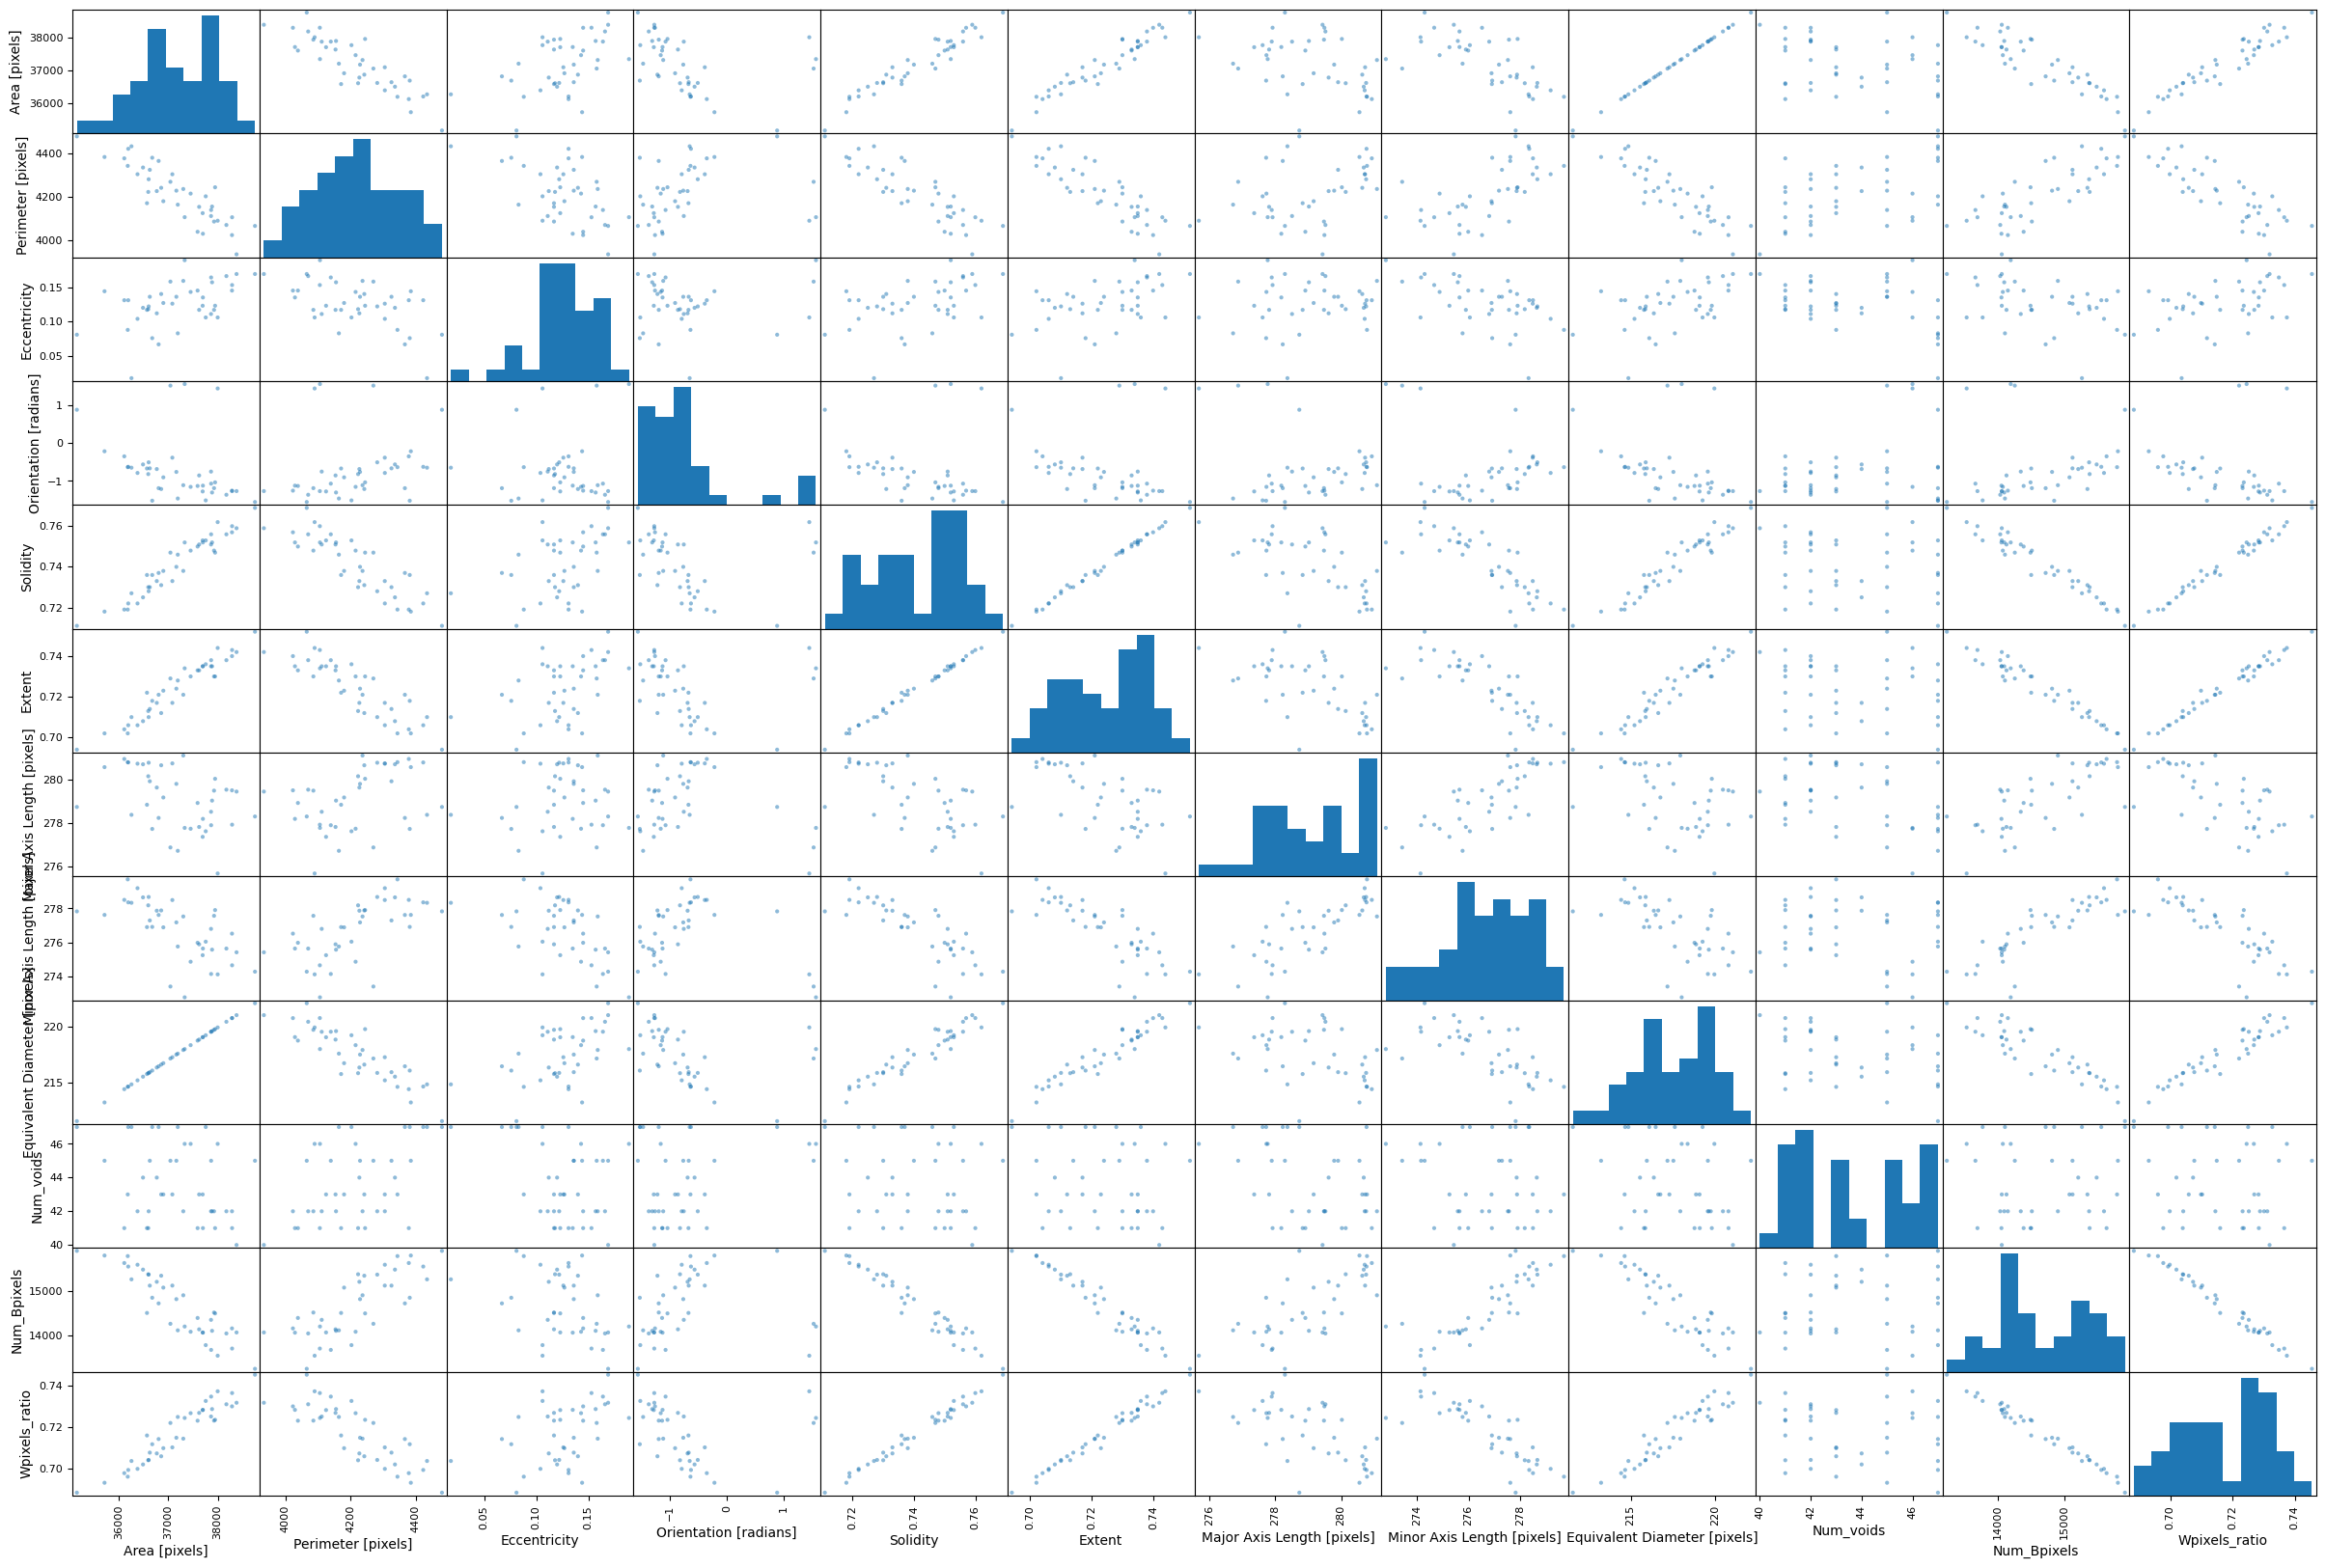

In [50]:
#Scatter plot
pd.plotting.scatter_matrix(dataset, figsize = (20, 20))
plt.show()

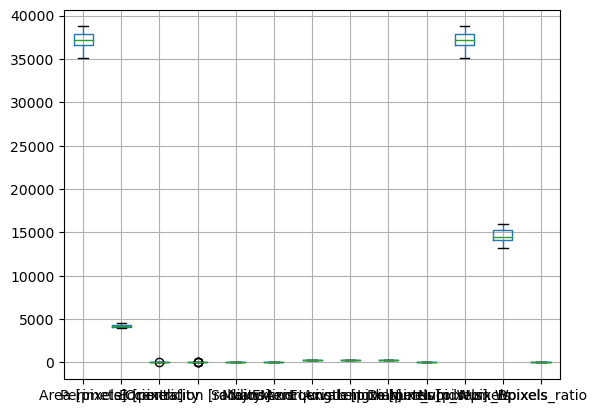

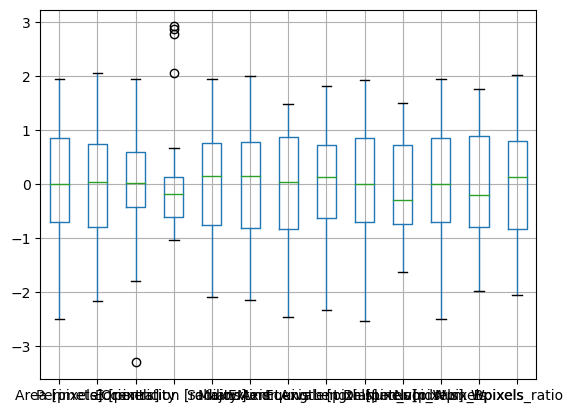

In [91]:
# boxplot
dataset.boxplot()
plt.show() 
# need to scale vars

# Standardize the data
data_std = (dataset - dataset.mean()) / dataset.std()

data_std.boxplot()
plt.show() 

In [92]:
cor_matrix_std = data_std.corr()
cor_matrix_std

Area [pixels]  Perimeter [pixels]  Eccentricity  \
Area [pixels]                      1.000000           -0.868500      0.487220   
Perimeter [pixels]                -0.868500            1.000000     -0.550430   
Eccentricity                       0.487220           -0.550430      1.000000   
Orientation [radians]             -0.350386            0.242124      0.043713   
Solidity                           0.959698           -0.864030      0.458303   
Extent                             0.958566           -0.867636      0.460953   
Major Axis Length [pixels]        -0.405992            0.358189      0.107364   
Minor Axis Length [pixels]        -0.642584            0.631061     -0.525895   
Equivalent Diameter [pixels]       0.999978           -0.868537      0.486802   
Num_voids                         -0.310867            0.479868     -0.387112   
Num_Wpixels                        1.000000           -0.868500      0.487220   
Num_Bpixels                       -0.895196            0.782083     -0.387367   
Wpixels_ratio                      0.948576           -0.826997      0.427530   

                              Orientation [radians]  Solidity    Extent  \
Area [pixels]                             -0.350386  0.959698  0.958566   
Perimeter [pixels]                         0.242124 -0.864030 -0.867636   
Eccentricity                               0.043713  0.458303  0.460953   
Orientation [radians]                      1.000000 -0.213460 -0.220811   
Solidity                                  -0.213460  1.000000  0.997646   
Extent                                    -0.220811  0.997646  1.000000   
Major Axis Length [pixels]                -0.182344 -0.620355 -0.608374   
Minor Axis Length [pixels]                -0.192366 -0.809900 -0.800234   
Equivalent Diameter [pixels]              -0.350894  0.959639  0.958493   
Num_voids                                  0.270365 -0.154354 -0.171724   
Num_Wpixels                               -0.350386  0.959698  0.958566   
Num_Bpixels                                0.184899 -0.972322 -0.970541   
Wpixels_ratio                             -0.241000  0.990632  0.988958   

                              Major Axis Length [pixels]  \
Area [pixels]                                  -0.405992   
Perimeter [pixels]                              0.358189   
Eccentricity                                    0.107364   
Orientation [radians]                          -0.182344   
Solidity                                       -0.620355   
Extent                                         -0.608374   
Major Axis Length [pixels]                      1.000000   
Minor Axis Length [pixels]                      0.776953   
Equivalent Diameter [pixels]                   -0.406034   
Num_voids                                      -0.415304   
Num_Wpixels                                    -0.405992   
Num_Bpixels                                     0.721335   
Wpixels_ratio                                  -0.639180   

                              Minor Axis Length [pixels]  \
Area [pixels]                                  -0.642584   
Perimeter [pixels]                              0.631061   
Eccentricity                                   -0.525895   
Orientation [radians]                          -0.192366   
Solidity                                       -0.809900   
Extent                                         -0.800234   
Major Axis Length [pixels]                      0.776953   
Minor Axis Length [pixels]                      1.000000   
Equivalent Diameter [pixels]                   -0.642224   
Num_voids                                      -0.140197   
Num_Wpixels                                    -0.642584   
Num_Bpixels                                     0.849243   
Wpixels_ratio                                  -0.803835   

                              Equivalent Diameter [pixels]  Num_voids  \
Area [pixels]                                     0.999978  -0.310867   
Perimeter [pixel

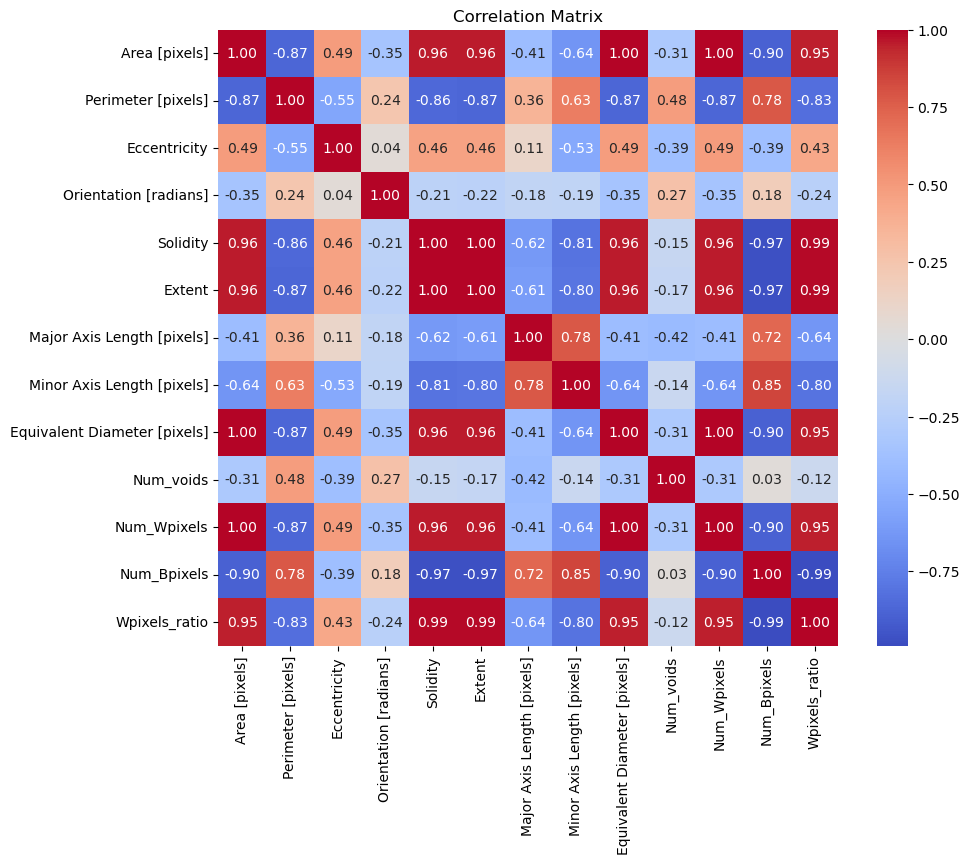

In [93]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix_std, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## parts
YES Area [pixels]
	we keep it
YES Perimeter [pixels]
	we keep it
NO Eccentricity
	i dont think it would be useful to keep
	to see why, plot compare_old_new_imgages(14) and compare_old_new_imgages(15),
	as 14 as eccentricity -3 while 15 has eccentricity 0.ish, but visually
	they look the same for me
NO Orientation [radians] 
	useless since we rotated/centered/ecc the images
NO Solidity 
	we remove it being equal to area morally
NO Extent 
	we remove it being equal to area morally

CHOOSE ONE Major Axis Length [pixels] 
CHOOSE ONE Minor Axis Length [pixels] 
	we decided to keep just one of these two

NO Equivalent Diameter [pixels] 
	again equal to area morally (correlation 1 with that)
NO Num_voids 
	it is discrete unfortunately
NO Num_Wpixels 
	again equal to area morally 
NO Num_Bpixels 
	again equal to area morally
NO Wpixels_ratio 
	again equal to area morally

## voids
Then we need to decide what to do with the voids data

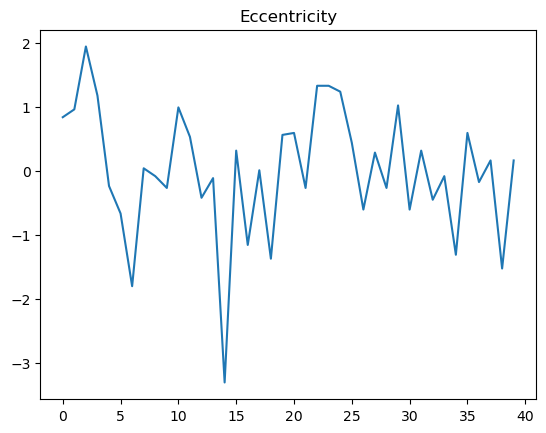

In [98]:
# column_name = 'Major Axis Length [pixels]'
# column_name = 'Minor Axis Length [pixels]'
column_name = 'Eccentricity'
plt.plot(data_std[column_name])
plt.title(f'{column_name}')
plt.show()


Cumulative explained variance ratio 
 [0.88847668 1.        ]


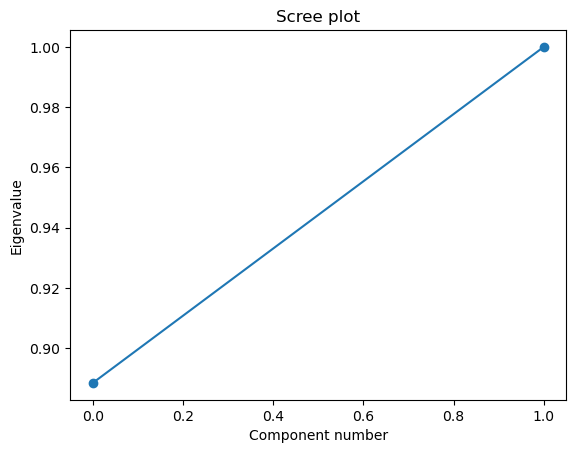

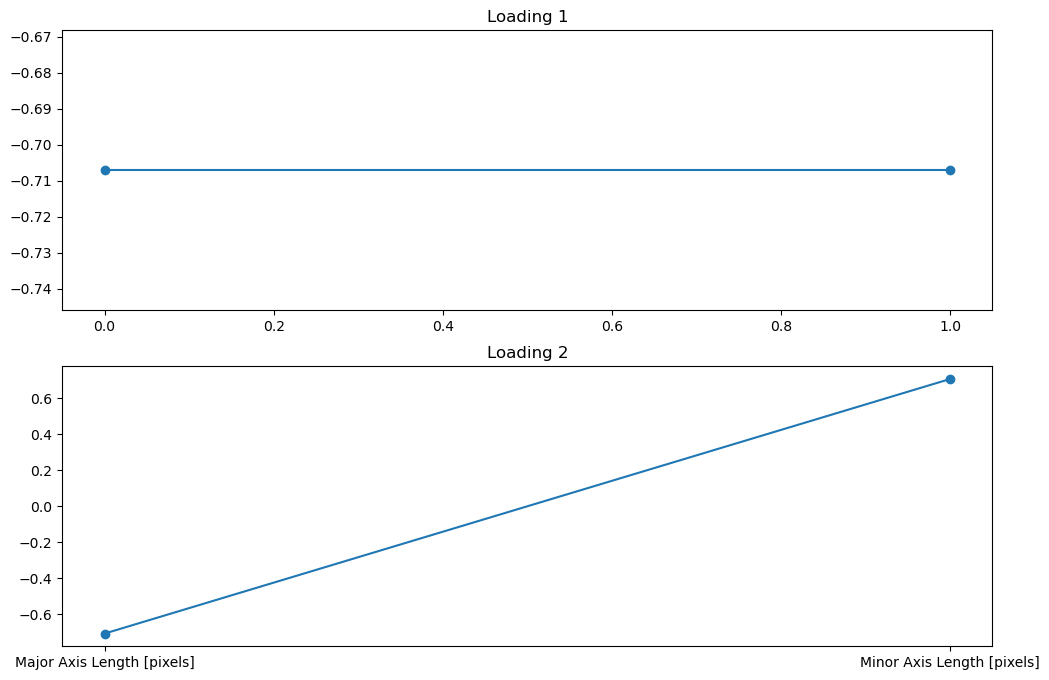

In [102]:
# a test to merge some variables

# Create the PCA object
pca = PCA()
# Fit the PCA object to the data
data_subset = data_std[['Major Axis Length [pixels]', 'Minor Axis Length [pixels]']]
pca.fit(data_subset)
print("\nCumulative explained variance ratio \n", np.cumsum(pca.explained_variance_ratio_))

# Scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.xlabel('Component number')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')
plt.show()

# Loadings
# Plot only the first k PCs
k = 2
fig, ax = plt.subplots(k, 1, figsize = (12, 8))
for i in range(k):
   ax[i].plot(pca.components_[i], 'o-')
   plt.xticks(ticks=np.arange(0, len(data_subset.columns.tolist()), step=1), labels=data_subset.columns)
   ax[i].set_title('Loading ' + str(i+1))
   


# Old code

Some notes:  
- which is the scope?  
- can we create new variables?  
-  adding image analysis  
- the eccentricity --> log(-eccentricity) ( for normality)  
- remove outliers/ interpret them


In [22]:
# Anderson-Darling test ???? SOME PROBLEMS

def ADpvalue(data):
	"""
	This function computes the p-value of the Anderson-Darling test.
	
	Input:
		data: data to be tested
	Output:
		p_value_AD: p-value of the Anderson-Darling test
	"""
	anderson = stats.anderson(data, dist='norm')
	# compute the p-value of the Anderson-Darling test
	if anderson.statistic >= 0.6:
		p_value_AD = np.exp(1.2937 - 5.709*anderson.statistic + 0.0186*(anderson.statistic**2))
	elif anderson.statistic >= 0.34:
		p_value_AD = np.exp(0.9177 - 4.279*anderson.statistic - 1.38*(anderson.statistic**2))
	elif anderson.statistic >= 0.2:
		p_value_AD = 1 - np.exp(-8.318 + 42.796*anderson.statistic - 59.938*(anderson.statistic**2))
	else:
		p_value_AD = 1 - np.exp(-13.436 + 101.14*anderson.statistic - 223.73*(anderson.statistic**2))

	return p_value_AD

# Example usage with a DataFrame 'dataNum'
# Assuming 'dataNum' is your DataFrame containing numerical data
# Assuming each column in 'dataNum' represents a variable you want to test

dataNum = df.select_dtypes(include=np.number)
for col in dataNum.columns.tolist():  
	p_value_AD = ADpvalue(dataNum[col])
	print(f'p-value of the Anderson-Darling test for {col}: {p_value_AD:.3f}')


p-value of the Anderson-Darling test for ID: 0.000
p-value of the Anderson-Darling test for Area [pixels]: inf
p-value of the Anderson-Darling test for Perimeter [pixels]: inf
p-value of the Anderson-Darling test for Eccentricity: 0.000
p-value of the Anderson-Darling test for Orientation [radians]: 0.000
p-value of the Anderson-Darling test for Solidity: 0.000
p-value of the Anderson-Darling test for Extent: 0.000
p-value of the Anderson-Darling test for Major Axis Length [pixels]: 1511030393770227162003779399905844333357419357264268208936458972611295710864454567262998905429485439856992987283169820189994024308959741793337201646307926041823825486650119331757704464815929662145550627110912.000
p-value of the Anderson-Darling test for Minor Axis Length [pixels]: inf
p-value of the Anderson-Darling test for Equivalent Diameter [pixels]: 19315448332851835944334324422462959672560793981042361528673147246919530470579697039170133220422593838138142737771726343084849060416283304997276745743537487

c:\Users\feder\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


Since for the scipy.special.boxcox transformation all variables must be positive, I apply a linear transformation to all the dataset --> dataset.pos = datset + pi/2+0.001.  
Rotate pi/2 Cartesian axis ( see slides REGION PROPERTIES - ORIENTATION)

Note that i chose to use this thpe of trasformation becuause the majority of the problem are related to the orientation column, in this way we obtain all positive values.

In [23]:
import math

dataNumTrasf = pd.DataFrame()  # Initialize an empty DataFrame to store transformed data

# Assuming dataNum is your DataFrame containing numerical data
dataNumTrasf = dataNum.iloc[:, 1:] + math.pi/2 + 0.001 # remove ID column

In [24]:

# Box-Cox transformation

data_norm = pd.DataFrame() 

for col in dataNumTrasf.columns.tolist():
	data_norm[col], lmbda = stats.boxcox(dataNumTrasf[col])
	print(f'Lambda for {col} = {lmbda:.3f}')


Lambda for Area [pixels] = -0.012
Lambda for Perimeter [pixels] = -0.019
Lambda for Eccentricity = 10.371
Lambda for Orientation [radians] = 0.774
Lambda for Solidity = 24.228
Lambda for Extent = -1.098
Lambda for Major Axis Length [pixels] = 0.059
Lambda for Minor Axis Length [pixels] = -0.087
Lambda for Equivalent Diameter [pixels] = -0.095
Lambda for Part_ID = 0.717
Lambda for Num_voids = -0.523


In [25]:
for col in data_norm.columns.tolist():
  # Shapiro-Wilk test
  _, p_value_SW = stats.shapiro(data_norm[col])
  print('p-value of the Shapiro-Wilk ', col, ' test: %.3f' % p_value_SW)

p-value of the Shapiro-Wilk  Area [pixels]  test: 0.000
p-value of the Shapiro-Wilk  Perimeter [pixels]  test: 0.000
p-value of the Shapiro-Wilk  Eccentricity  test: 0.000
p-value of the Shapiro-Wilk  Orientation [radians]  test: 0.000
p-value of the Shapiro-Wilk  Solidity  test: 0.000
p-value of the Shapiro-Wilk  Extent  test: 0.000
p-value of the Shapiro-Wilk  Major Axis Length [pixels]  test: 0.000
p-value of the Shapiro-Wilk  Minor Axis Length [pixels]  test: 0.000
p-value of the Shapiro-Wilk  Equivalent Diameter [pixels]  test: 0.000
p-value of the Shapiro-Wilk  Part_ID  test: 0.000
p-value of the Shapiro-Wilk  Num_voids  test: 0.000


The box cox trasformation does not solve the pb of guassian distrution -> we can try more values for lambda / outlier analysis

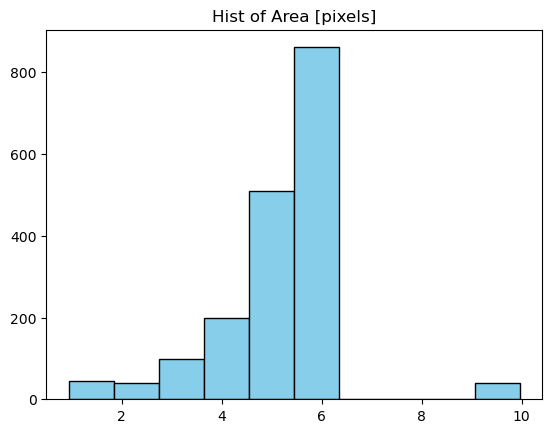

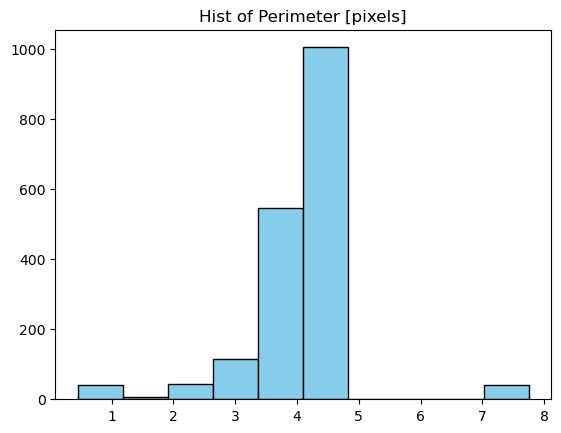

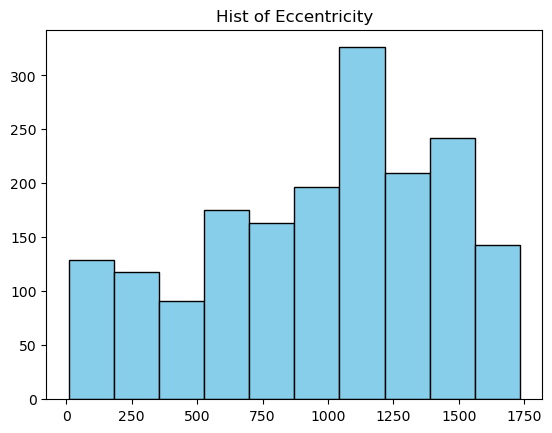

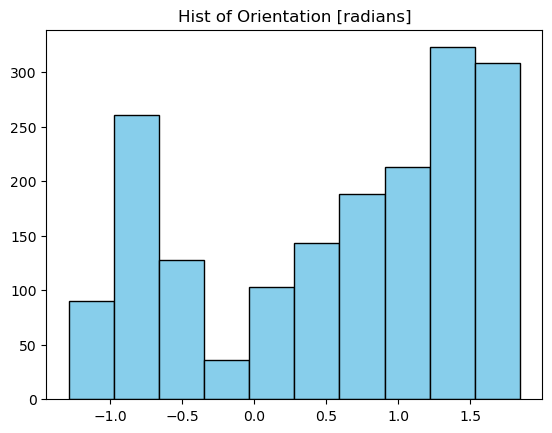

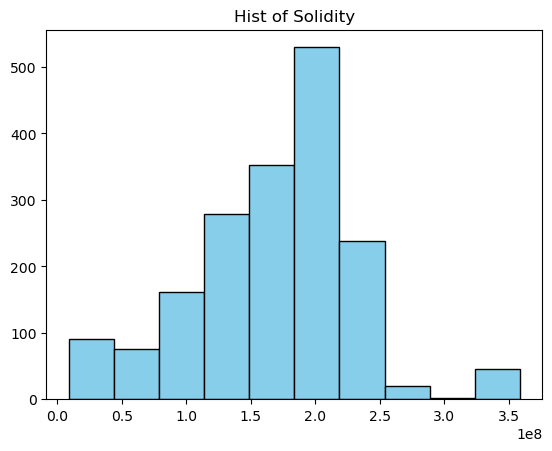

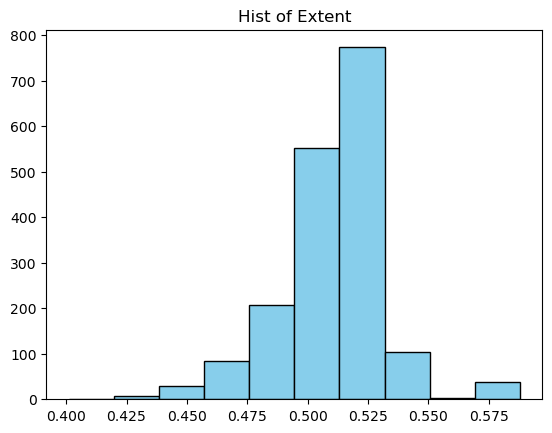

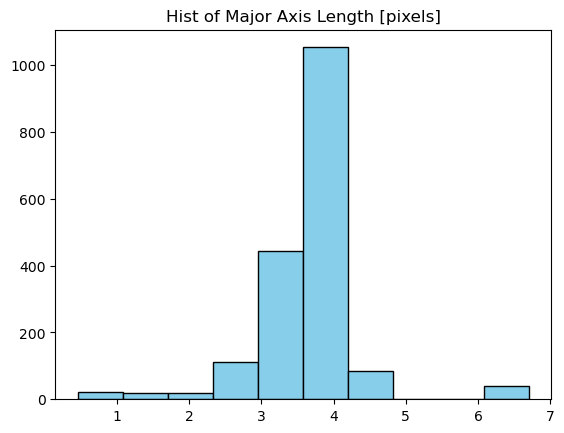

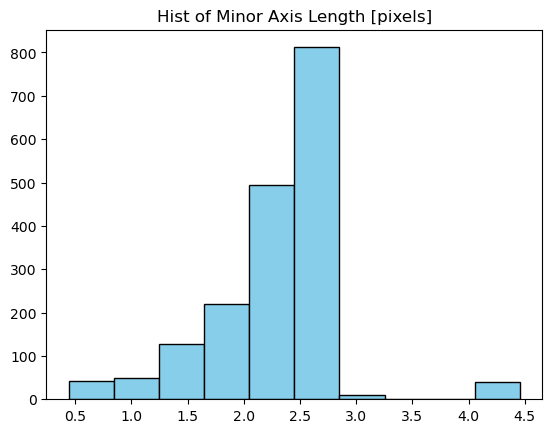

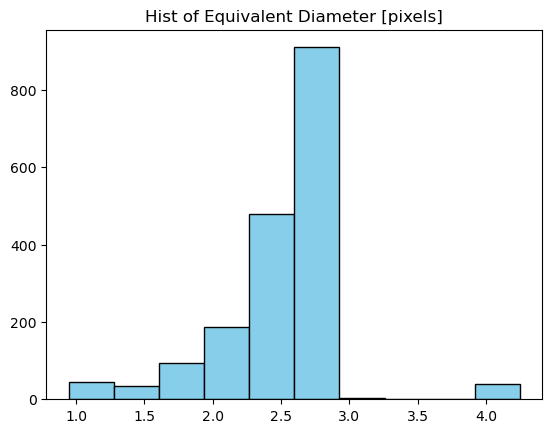

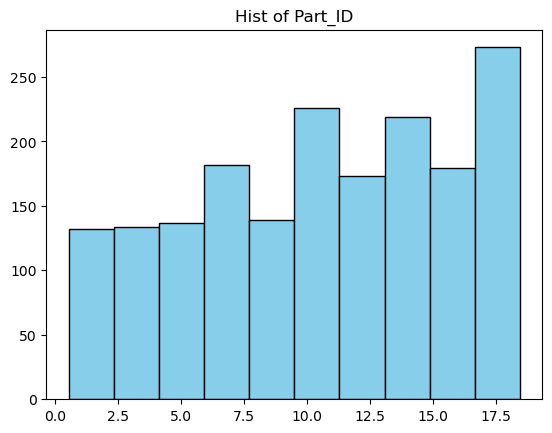

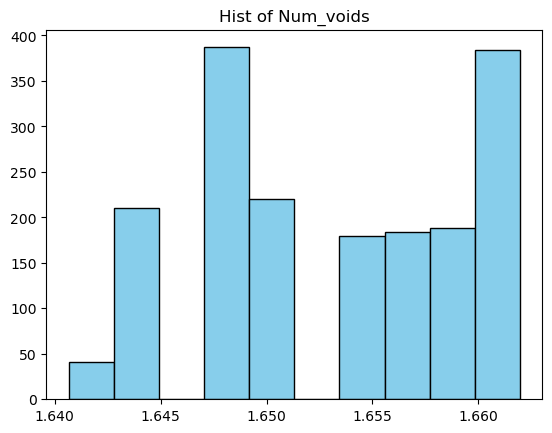

In [26]:
for col in data_norm.columns.tolist():
  # Shapiro-Wilk test
  plt.hist(data_norm[col], bins=10, color='skyblue', edgecolor='black')
  plt.title(f'Hist of {col}')
  plt.show()

# Continuization of num voids?
just an experiment

P-value di normalità for nvoids: 0.00202201004140079 - normality (alpha 5%)? False


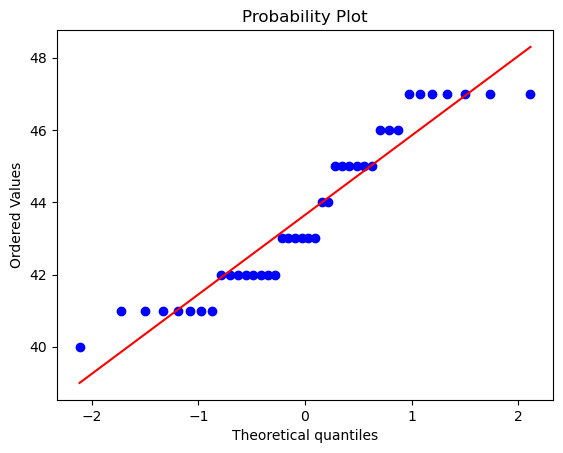

In [177]:
nvoids = df_new_parts["Num_voids"].copy()

stats.probplot(nvoids, dist="norm", plot=plt)
shapiro_stat, shapiro_pvalue_parts = stats.shapiro(nvoids)
# Stampa i risultati
print(f"P-value di normalità for nvoids: {shapiro_pvalue_parts} - normality (alpha 5%)? {shapiro_pvalue_parts>0.05}")

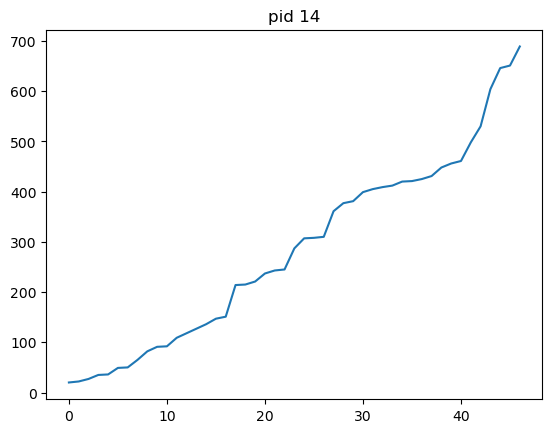

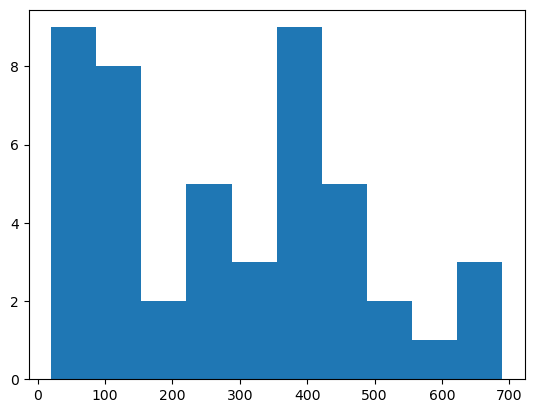

In [178]:
pid = random.randint(0,39)
img_df = df_new_voids.loc[df_new_voids['Part_ID'] == pid, ]
# img_df

plt.plot(np.sort(img_df['Area [pixels]']))
plt.title(f"pid {pid}")
plt.show()
plt.hist(np.sort(img_df['Area [pixels]']),bins=10)
plt.show()

here starts the real part

0 13
1 4
2 1
3 1
4 25
5 38
6 18
7 15
8 17
9 1
10 14
11 1
12 3
13 11
14 20
15 2
16 23
17 1
18 16
19 2
20 1
21 7
22 6
23 4
24 18
25 2
26 2
27 2
28 24
29 5
30 2
31 4
32 11
33 46
34 2
35 14
36 2
37 88
38 12
39 2


(-0.5, 30.0)

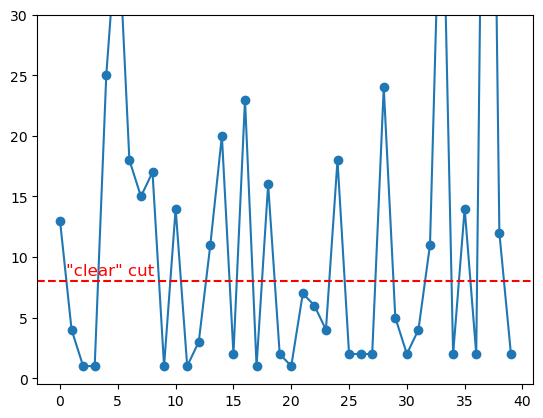

In [184]:
mins = np.zeros(40)
for pid in range(40):
	img_df = df_new_voids.loc[df_new_voids['Part_ID'] == pid, ]
	# img_df
	# val = np.percentile(img_df['Area [pixels]'], 2)
	val = np.min(img_df['Area [pixels]'])
	mins[pid] = val
	print(pid,val)
	
# it seems that under 10 pixels they are all errors (or even 9)
# as in the mins there is a jump between values <10 (false voids) and >10 (true voids)
plt.plot(mins,'o-')
plt.axhline(y=8, color='r', linestyle='--')
plt.text(0.5,8.5, '"clear" cut', fontsize=12, color='r')
plt.ylim(-0.5,30)

7

In [180]:
nvoids_update = nvoids.copy()
threshold = 10

for pid in range(40):
	img_df = df_new_voids.loc[df_new_voids['Part_ID'] == pid, ]
	nvoids_update[pid] -= np.count_nonzero(img_df['Area [pixels]'] < threshold)
	print(f"pid {pid}: from {nvoids[pid]} to {nvoids_update[pid]}")

# but we are not yet normal
shapiro_stat, shapiro_pvalue_parts = stats.shapiro(nvoids_update)
# Stampa i risultati
print(f"P-value of normality for nvoids_update: {shapiro_pvalue_parts} - normality (alpha 5%)? {shapiro_pvalue_parts>0.05}")

print("nvoids       :",nvoids.values)
print("nvoids_update:",nvoids_update.values)

pid 0: from 41 to 41
pid 1: from 42 to 41
pid 2: from 46 to 43
pid 3: from 45 to 41
pid 4: from 41 to 41
pid 5: from 42 to 42
pid 6: from 47 to 47
pid 7: from 43 to 43
pid 8: from 43 to 43
pid 9: from 43 to 42
pid 10: from 45 to 45
pid 11: from 46 to 42
pid 12: from 44 to 42
pid 13: from 42 to 42
pid 14: from 47 to 47
pid 15: from 45 to 44
pid 16: from 43 to 43
pid 17: from 43 to 42
pid 18: from 47 to 47
pid 19: from 45 to 44
pid 20: from 42 to 40
pid 21: from 42 to 41
pid 22: from 45 to 44
pid 23: from 40 to 39
pid 24: from 42 to 42
pid 25: from 43 to 41
pid 26: from 46 to 45
pid 27: from 41 to 40
pid 28: from 41 to 41
pid 29: from 42 to 41
pid 30: from 47 to 46
pid 31: from 45 to 44
pid 32: from 42 to 42
pid 33: from 41 to 41
pid 34: from 47 to 44
pid 35: from 41 to 41
pid 36: from 44 to 43
pid 37: from 41 to 41
pid 38: from 47 to 47
pid 39: from 47 to 44
P-value of normality for nvoids_update: 0.00467785494402051 - normality (alpha 5%)? False
nvoids       : [41 42 46 45 41 42 47 43 

In [173]:
# nvoids_update_bxcxtransf, lmbda = stats.boxcox(nvoids_update)
# print(f'Lambda for nvoids_update = {lmbda:.3f}')

# doesnt work, gives always the same values
# https://github.com/scipy/scipy/issues/6873
# so this was a work around found online

# we shift the nvoids_update
nvoids_update = nvoids_update-np.min(nvoids_update)+1
# otherwise again nothing works
# and then transform
from scipy.stats import boxcox_normmax
lmax = boxcox_normmax(nvoids_update)#, brack=(-2.0,1.99),  method='mle')
print(lmax)

nvoids_update_bxcxtransf = stats.boxcox(nvoids_update, lmax)
for i in range(40):
	print(i,"->",nvoids_update[i],nvoids_update_bxcxtransf[i])


0.389010477604029
0 -> 3 1.370714856503463
1 -> 3 1.370714856503463
2 -> 5 2.2371636753027557
3 -> 3 1.370714856503463
4 -> 3 1.370714856503463
5 -> 4 1.8374234665860418
6 -> 9 3.4723256346893283
7 -> 5 2.2371636753027557
8 -> 5 2.2371636753027557
9 -> 4 1.8374234665860418
10 -> 7 2.9095030372120387
11 -> 4 1.8374234665860418
12 -> 4 1.8374234665860418
13 -> 4 1.8374234665860418
14 -> 9 3.4723256346893283
15 -> 6 2.5905395255102532
16 -> 5 2.2371636753027557
17 -> 4 1.8374234665860418
18 -> 9 3.4723256346893283
19 -> 6 2.5905395255102532
20 -> 2 0.7955953659413303
21 -> 3 1.370714856503463
22 -> 6 2.5905395255102532
23 -> 1 0.0
24 -> 4 1.8374234665860418
25 -> 3 1.370714856503463
26 -> 7 2.9095030372120387
27 -> 2 0.7955953659413303
28 -> 3 1.370714856503463
29 -> 3 1.370714856503463
30 -> 8 3.2016920857335904
31 -> 6 2.5905395255102532
32 -> 4 1.8374234665860418
33 -> 3 1.370714856503463
34 -> 6 2.5905395255102532
35 -> 3 1.370714856503463
36 -> 5 2.2371636753027557
37 -> 3 1.37071485

P-value of normality for nvoids_update_bxcxtransf: 0.060751691460609436 - normality (alpha 5%)? True


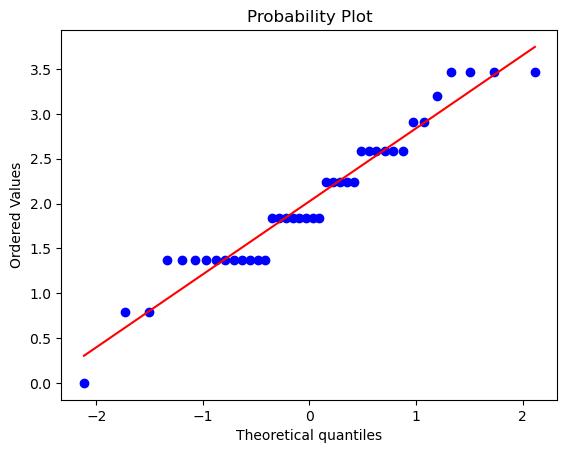

In [174]:
# and now (just a bit) we have gaussianity
stats.probplot(nvoids_update_bxcxtransf, dist="norm", plot=plt)
shapiro_stat, shapiro_pvalue_parts = stats.shapiro(nvoids_update_bxcxtransf)
print(f"P-value of normality for nvoids_update_bxcxtransf: {shapiro_pvalue_parts} - normality (alpha 5%)? {shapiro_pvalue_parts>0.05}")

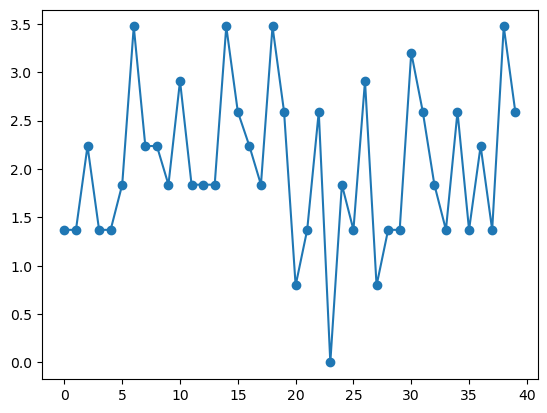

In [146]:
plt.plot(nvoids_update_bxcxtransf,"o-")
plt.show()